# Amazon Fine Food Reviews

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *

In [3]:
path = Path('/home/jupyter/work/data')

## Language Model

In [6]:
# https://docs.fast.ai/data_block.html
data_lm = (TextList
           .from_csv(path, 'Reviews.csv', cols='Text')
           #Where are the text? Column 'Text' of Reviews.csv
           .split_by_rand_pct()
           #How to split it? Randomly with the default 20% in valid
           .label_for_lm()
           #Label it for a language model
           .databunch())
           #Finally we convert to a DataBunch

In [7]:
data_lm.save('amazon_reviews_lm.pkl')

In [4]:
bs = 48
data_lm = load_data(path, 'amazon_reviews_lm.pkl', bs=bs)

In [5]:
data_lm.show_batch()

idx,text
0,"peanuts were actually small sized unsalted . xxmaj not sure if this was an error or if the vendor intended to represent the product as "" xxmaj jumbo "" . xxbos xxmaj this is a confection that has been around a few centuries . xxmaj it is a light , pillowy citrus gelatin with nuts - in this case xxmaj filberts . xxmaj and it is cut into tiny"
1,nuts every 3 month . xxmaj mauna xxmaj loa xxmaj nuts have been always fresh . xxbos xxmaj these nuts are to die for ! xxmaj and i agree with the other reviewers ... they are absolutely addictive . i 'm not a coffee drinker so i was n't sure i 'd like the taste . xxmaj but they are delicious . xxmaj just barely a hint of a
2,"xxmaj shake & xxmaj bake is light years ahead of a meal like xxmaj hamburger - helper as far as nutrition goes , so i like to always have some around for emergencies . i 'll even try it on fish if that 's the only meat i happen to have around . \n \n xxmaj just the right amount of spices , easy , low - cal ,"
3,this is going to put it in perspective ; \n 1 ) xxmaj the average size bags are about 1.69 ounces \n 2 ) xxmaj the larger size bags range from 9 - 11 ounces depending on which one as they make several . \n 3 ) xxmaj this bag was just over 42 ounces and they go up to 60 ounces in certain packaging . \n
4,"is also tasty and provides great energy . xxbos i picked up a case of these , hoping to find a cheaper alternative to 5-hour xxmaj energy ( at less than 1 / 3 the price , this is definitely cheaper ) . xxmaj red xxmaj rain tastes fine ( berry flavor ) and provides a similar pick me up that you 'd find from 5-hour xxmaj energy ,"


In [6]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.29E-02


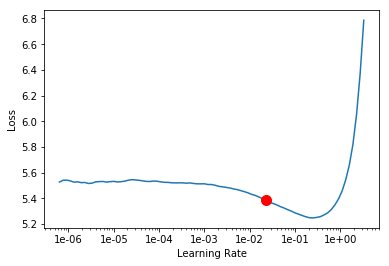

In [11]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [12]:
min_grad_lr = learn.recorder.min_grad_lr
min_grad_lr

0.022908676527677745

In [13]:
learn.fit_one_cycle(1, min_grad_lr, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.816456,3.648370,0.304551,1:31:49


In [14]:
learn.save('amazon_reviews_lm_freeze', return_path=True)

PosixPath('/home/jupyter/work/data/models/amazon_reviews_lm_freeze.pth')

In [7]:
learn.load('amazon_reviews_lm_freeze')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (454764 items)
x: LMTextList
xxbos i have bought several of the xxmaj vitality canned dog food products and have found them all to be of good quality . xxmaj the product looks more like a stew than a processed meat and it smells better . xxmaj my xxmaj labrador is finicky and she appreciates this product better than most .,xxbos xxmaj product arrived labeled as xxmaj jumbo xxmaj salted xxmaj peanuts ... the peanuts were actually small sized unsalted . xxmaj not sure if this was an error or if the vendor intended to represent the product as " xxmaj jumbo " .,xxbos xxmaj this is a confection that has been around a few centuries . xxmaj it is a light , pillowy citrus gelatin with nuts - in this case xxmaj filberts . xxmaj and it is cut into tiny squares and then liberally coated with powdered sugar . xxmaj and it is a tiny mouthful of heaven . xxmaj not too chewy , and very flavorful . i highly recommend this yummy treat . xxmaj if y

In [9]:
learn.unfreeze()
learn.fit_one_cycle(1, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.307281,3.207757,0.360729,1:46:41


In [10]:
learn.save('amazon_reviews_fine_tuned')

In [24]:
learn.load('amazon_reviews_fine_tuned')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (454764 items)
x: LMTextList
xxbos i have bought several of the xxmaj vitality canned dog food products and have found them all to be of good quality . xxmaj the product looks more like a stew than a processed meat and it smells better . xxmaj my xxmaj labrador is finicky and she appreciates this product better than most .,xxbos xxmaj product arrived labeled as xxmaj jumbo xxmaj salted xxmaj peanuts ... the peanuts were actually small sized unsalted . xxmaj not sure if this was an error or if the vendor intended to represent the product as " xxmaj jumbo " .,xxbos xxmaj this is a confection that has been around a few centuries . xxmaj it is a light , pillowy citrus gelatin with nuts - in this case xxmaj filberts . xxmaj and it is cut into tiny squares and then liberally coated with powdered sugar . xxmaj and it is a tiny mouthful of heaven . xxmaj not too chewy , and very flavorful . i highly recommend this yummy treat . xxmaj if y

In [8]:
#learn.save_encoder('amazon_reviews_fine_tuned_enc')
TEXT = "Product arrived on time"
N_WORDS = 40
N_SENTENCES = 2

In [9]:
#learn.load_encoder('amazon_reviews_fine_tuned_enc')
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

Product arrived on time and very fresh . i have been buying it in the USA for years . It was delivered on time and i will definitely order from them again . Thanks . xxbos First time i tried
Product arrived on time and was in good shape . i highly recommend it . xxbos Love these chips ! i have tried a few others and the crunch is great .... Just not my favorite . They are


In [10]:
df = pd.read_csv('/home/jupyter/work/data/Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [11]:
def get_sentiment(value):
    if value > 3:
        return 1
    else:
        return 0

In [12]:
df['Sentiment'] = df['Score'].apply(get_sentiment)

In [13]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1


In [14]:
df = df.loc[:, ['Text', 'Sentiment']]

In [16]:
df.to_csv('Reviews_Sentiment.csv', index=False)

## Classifier

In [28]:
data_clas = (TextList.from_csv(path, 'Reviews_Sentiment.csv', cols='Text', vocab=data_lm.vocab)
                   .split_by_rand_pct()
                   .label_from_df(cols='Sentiment')
                   .databunch())

In [29]:
data_clas.save('amazon_reviews_clas.pkl')

In [5]:
data_clas = load_data(path, 'amazon_reviews_clas.pkl', bs=32)

In [8]:
data_clas.show_batch()

text,target
"xxbos xxmaj fuzzy xxmaj wuzzy 's xxmaj summary : \n * * * xxmaj somewhat recommended , with reservations and only lukewarm fuzzies . \n \n xxmaj positives : \n \n + xxmaj not too expensive compared to other bottled water , although it is not cheap either . \n \n xxmaj negatives : \n \n - xxmaj this bottled water product 's labeling ,",0
"xxbos xxmaj update : 3 - 9 - 12 \n \n xxmaj tomorrow marks the six - month anniversary of xxmaj whisper 's attack . xxmaj it 's hard to wrap my mind around that with an objective perspective . xxmaj he 's going to get steamed salmon filet to celebrate , and i will celebrate by trying to continue to spread the word about this wonderful tea !",1
xxbos xxmaj diamond xxmaj almonds \n xxmaj almonds are a good source of magnesium . xxmaj one ounce contain approximately 20 % of the xxup rda for an adult recommended dietary allowance ( xxup rda ) \n xxmaj recommended xxmaj dietary xxmaj allowance ( xxup rda ) the amounts of selected nutrients considered adequate to meet the known nutrient needs of healthy people . xxmaj the xxup rda,1
"xxbos i ordered three packages because the price was so good , then i saw this . i am asking xxmaj amazon for a refund - otherwise , they are going in the trash unused . \n \n xxmaj copied from xxup fda web site . \n \n xxup fda xxmaj continues to xxmaj caution xxmaj dog xxmaj owners xxmaj about xxmaj chicken xxmaj jerky xxmaj products \n",0
"xxbos i 've been using xxmaj zuke 's xxmaj mini 's for training since i first brought my girl home and she ( surprisingly , for she 's quite picky ) still tolerates them and * sometimes * even seems to want to work for them . ( xxmaj not having a food motivated dog xxup sucks for training - i could literally be walking around with big macs in",1


In [25]:
learn.save_encoder('amazon_reviews_fine_tuned_enc')

In [6]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.3)
learn.load_encoder('amazon_reviews_fine_tuned_enc')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.92E-02


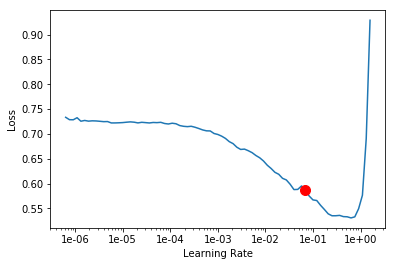

In [33]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [34]:
min_grad_lr = learn.recorder.min_grad_lr
min_grad_lr

0.06918309709189363

In [35]:
learn.fit_one_cycle(1, min_grad_lr, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.247247,0.217628,0.909596,38:37


In [36]:
learn.save('amazon_reviews_clas_first')

In [37]:
learn.load('amazon_reviews_clas_first')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (454764 items)
x: TextList
xxbos xxmaj this is a confection that has been around a few centuries . xxmaj it is a light , pillowy citrus gelatin with nuts - in this case xxmaj filberts . xxmaj and it is cut into tiny squares and then liberally coated with powdered sugar . xxmaj and it is a tiny mouthful of heaven . xxmaj not too chewy , and very flavorful . i highly recommend this yummy treat . xxmaj if you are familiar with the story of xxup c.s. xxmaj lewis ' " xxmaj the xxmaj lion , xxmaj the xxmaj witch , and xxmaj the xxmaj wardrobe " - this is the treat that seduces xxmaj edmund into selling out his xxmaj brother and xxmaj sisters to the xxmaj witch .,xxbos xxmaj if you are looking for the secret ingredient in xxmaj robitussin i believe i have found it . i got this in addition to the xxmaj root xxmaj beer xxmaj extract i ordered ( which was good ) and made some cherry soda . xxmaj the flavor is very medicinal .,xxbos xxmaj great

In [38]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/2., 1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.158002,0.137935,0.946750,44:59


In [39]:
learn.save('amazon_reviews_clas_second')

In [7]:
learn.load('amazon_reviews_clas_second')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (454764 items)
x: TextList
xxbos xxmaj this is a confection that has been around a few centuries . xxmaj it is a light , pillowy citrus gelatin with nuts - in this case xxmaj filberts . xxmaj and it is cut into tiny squares and then liberally coated with powdered sugar . xxmaj and it is a tiny mouthful of heaven . xxmaj not too chewy , and very flavorful . i highly recommend this yummy treat . xxmaj if you are familiar with the story of xxup c.s. xxmaj lewis ' " xxmaj the xxmaj lion , xxmaj the xxmaj witch , and xxmaj the xxmaj wardrobe " - this is the treat that seduces xxmaj edmund into selling out his xxmaj brother and xxmaj sisters to the xxmaj witch .,xxbos xxmaj if you are looking for the secret ingredient in xxmaj robitussin i believe i have found it . i got this in addition to the xxmaj root xxmaj beer xxmaj extract i ordered ( which was good ) and made some cherry soda . xxmaj the flavor is very medicinal .,xxbos xxmaj great

In [9]:
learn.predict('Not a good purchase at the price point,lags a lot and there is no app lock in the phone.U have to download a third party app lock to lock ur apps and that is not safe at all.')

(Category 0, tensor(0), tensor([0.8020, 0.1980]))

In [10]:
learn.predict('I would say it is pretty good for the price. Looks sleek and slim, is light to carry around, screen display and sound is also good. Battery Life is pretty good at around 6+ Hrs')

(Category 1, tensor(1), tensor([0.0916, 0.9084]))

### Refrences
* [Fastai Course](https://course.fast.ai/)